In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import optimize
import pymc3 as pm
import statsmodels.api as sm # check the error that cannot import name 'factorial' in from scipy.misc import factorial
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import tensorflow as tf
import altair as alt
# from linearmodels.iv import IV2SLS
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
cpi = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/CPI.csv")
ppico = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/PPICO.csv")
ppimanu = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/PPIMANU.csv")
gdp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/GDPCR.csv")
unemp = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/UNRATE.csv")
govspend = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/FGEXPND.csv")

In [ ]:
aaa = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/AAA.csv")
bbb = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/BBB.csv")
effr = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/EFFR.csv")
ts10 = pd.read_csv("https://raw.githubusercontent.com/timider/dscproj/main/TS10.csv")

In [ ]:
df = pd.merge(cpi, ppico, how='inner', on='DATE')
df = pd.merge(df, ppimanu, how='inner', on='DATE')
df = pd.merge(df, gdp, how='inner', on='DATE')
df = pd.merge(df, unemp, how='inner', on='DATE')
df = pd.merge(df, govspend, how='inner', on='DATE')
df = pd.merge(df, aaa, how='inner', on='DATE')
df = pd.merge(df, bbb, how='inner', on='DATE')
df = pd.merge(df, effr, how='inner', on='DATE')
df = pd.merge(df, ts10, how='inner', on='DATE')

In [ ]:
df = df.rename({
    'PPI_CO':'PPICO',
    'CPIAUCSL_PC1':'CPI',
    'PCUOMFGOMFG_PC1':'PPIMANU',
    'GDPC1_PC1':'GDP',
    'UNRATE':'U',
    'FGEXPND_PC1':'GOVSPEND',
    'BAMLC0A4CBBBEY':'BBB',
    'DGS10':'BOND10'
    
}, axis='columns')

In [ ]:
cpi.nunique()

In [ ]:
cpi = cpi.rename(columns={'CPIAUCSL_PC1':'CPI'})
cpi.head()

In [14]:
type(cpi['DATE'])

pandas.core.series.Series

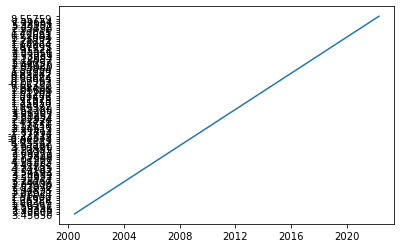

In [17]:
plt.plot(cpi['DATE'], cpi['CPI'])

In [18]:
ppico.head()

,DATE,PPIACO_PC1
0,2000-07-01,5.23438
1,2000-10-01,6.57277
2,2001-01-01,3.89908
3,2001-04-01,1.27055
4,2001-07-01,-1.03935


In [19]:
ppico = ppico.rename(columns={'PPIACO_PC1':'PPI_CO'})
ppico.head()

,DATE,PPI_CO
0,2000-07-01,5.23438
1,2000-10-01,6.57277
2,2001-01-01,3.89908
3,2001-04-01,1.27055
4,2001-07-01,-1.03935


In [22]:
ppico["DATE"] = pd.to_datetime(ppico["DATE"])

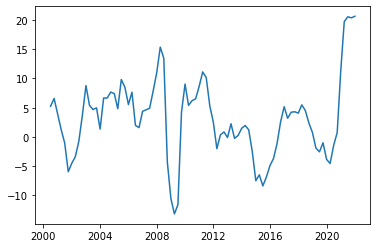

In [23]:
plt.plot(ppico['DATE'], ppico['PPI_CO'])

NameError: name 'df' is not defined

In [ ]:
dfst['CPI'] = stats.zscore(df['CPI']
                           